In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='white')

#GPU 사용 설정, -1이면 CPU 사용
# os.environ["CUDA_VISIBLE_DEVICES"] = "0, 1"

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for i in range(len(gpus)):
            tf.config.experimental.set_memory_growth(gpus[i], True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [68]:
X = np.load('/project/LSH/x_(7727,10,4068).npy')
y = np.load('/project/LSH/y_(7727,1).npy')
# 컬럼이름 로드
COLS = list(pd.read_csv('/project/LSH/total_data_7727.csv')['ITEMID'].sort_values().unique())

#death_index
d_index = np.where(y==1)[0]
#survive_index (퇴원 환자)
s_index = np.where(y==0)[0]

#사망/퇴원 환자 분리
d_X = X[d_index]
s_X = X[s_index]

result = []
result_s = []
#day - 10일
for d in range(10):
    #4068 - ITEM
    for f in range(d_X.shape[-1]):
        d_sum = d_X[:,d,f].sum()/d_X.shape[0]
        s_sum = s_X[:,d,f].sum()/s_X.shape[0]
        result.append({'cols':COLS[f], 'day':10-d,'per':d_sum})
        result_s.append({'cols':COLS[f], 'day':10-d,'per':s_sum})
        
d_df = pd.DataFrame(result).sort_values(['cols','day']).reset_index(drop=True)
d_df['day'] = d_df['day'].apply(lambda x:'D-'+str(x))
s_df = pd.DataFrame(result_s).sort_values(['cols','day']).reset_index(drop=True)
s_df['day'] = s_df['day'].apply(lambda x:'D-'+str(x))
d_df.shape, s_df.shape

def visualization(top10_list, name):
    plt.figure(figsize = (12,10), dpi=1000)
    i = 0
    for f in top10_list:
        if f == 0:
            continue
        plt.subplot(4,4,1+i)
        # plt.title(feature_name[f])
        plt.title(name[f])
        ax = sns.lineplot(data = d_df[d_df['cols']==int(f)], x = 'day', y='per', label='사망', marker='X')
        ax = sns.lineplot(data = s_df[s_df['cols']==int(f)], x = 'day', y='per', label='퇴원', linestyle=':', marker='o')
        ax.invert_xaxis()
        ax.legend(loc='upper left')
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        plt.xticks(['D-10','D-7','D-4','D-1'])
        

        i += 1
    plt.tight_layout()
    plt.savefig('Result_absum.png', dpi = 1000)

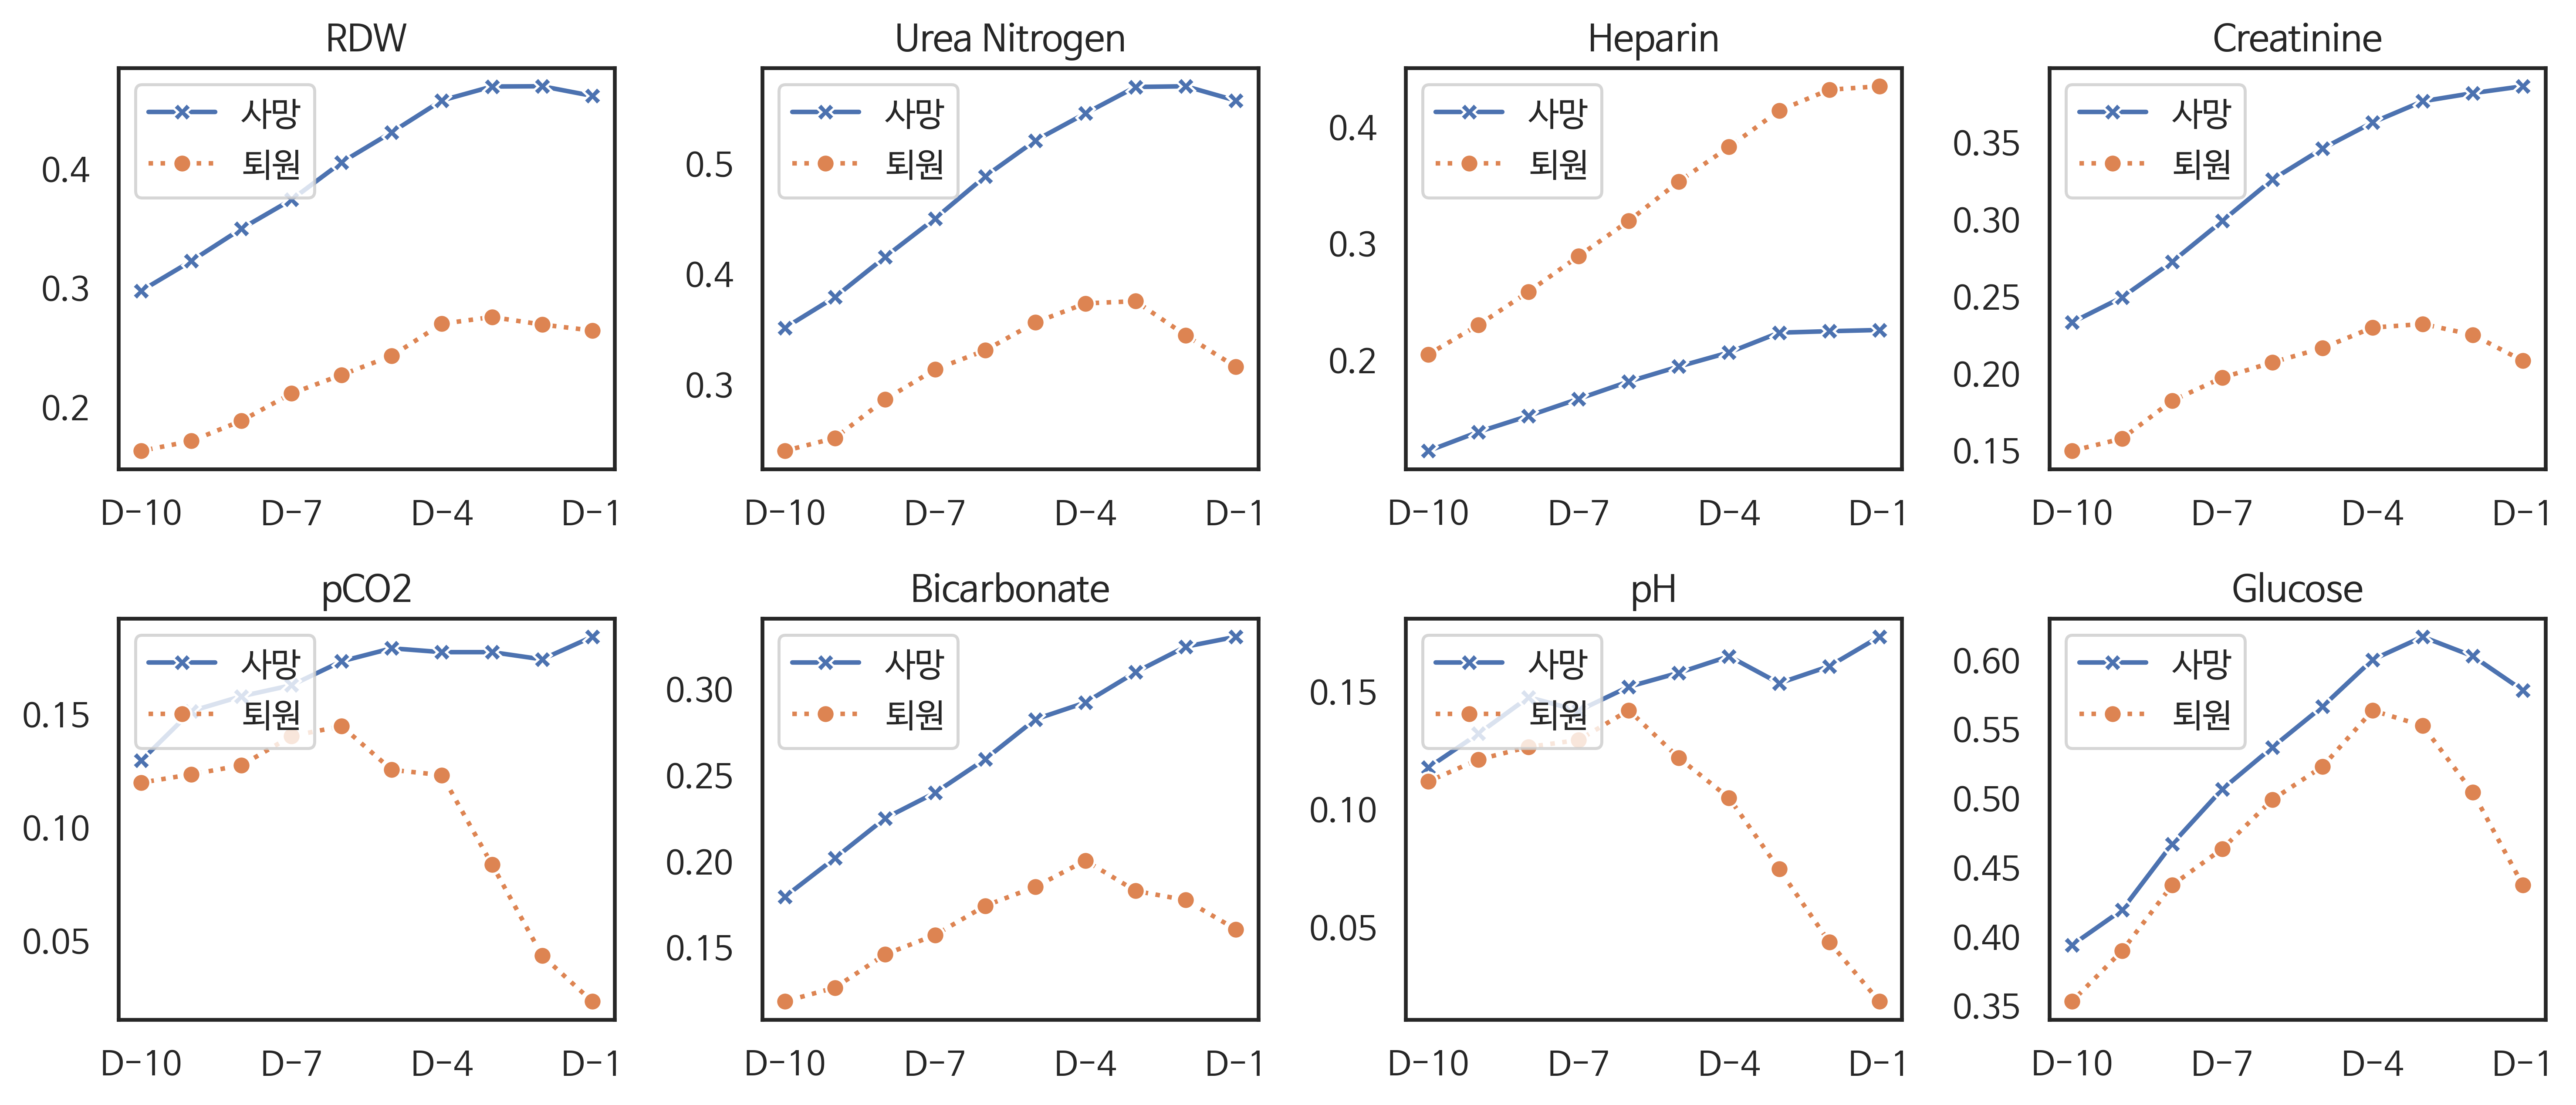

In [61]:
rf_fi = [51277, 51006, 63323026201, 50912, 50818, 50882, 50820, 50931]
name = {51277: 'RDW', 51006: 'Urea Nitrogen', 50912: 'Creatinine', 50882: 'Bicarbonate',
         63323026201 : 'Heparin', 55390000401 : 'Glucagon', 50818:'pCO2', 50820:'pH', 50931:'Glucose', 50821:'pO2'}
visualization(rf_fi, name)

In [ ]:
d_marker = [51277, 51006, 50912, 409176230]
name = {51277: 'RDW', 51006: 'Urea Nitrogen', 50912: 'Creatinine', 409176230:'Morphine Sulfate'}

visualization(d_marker, name)

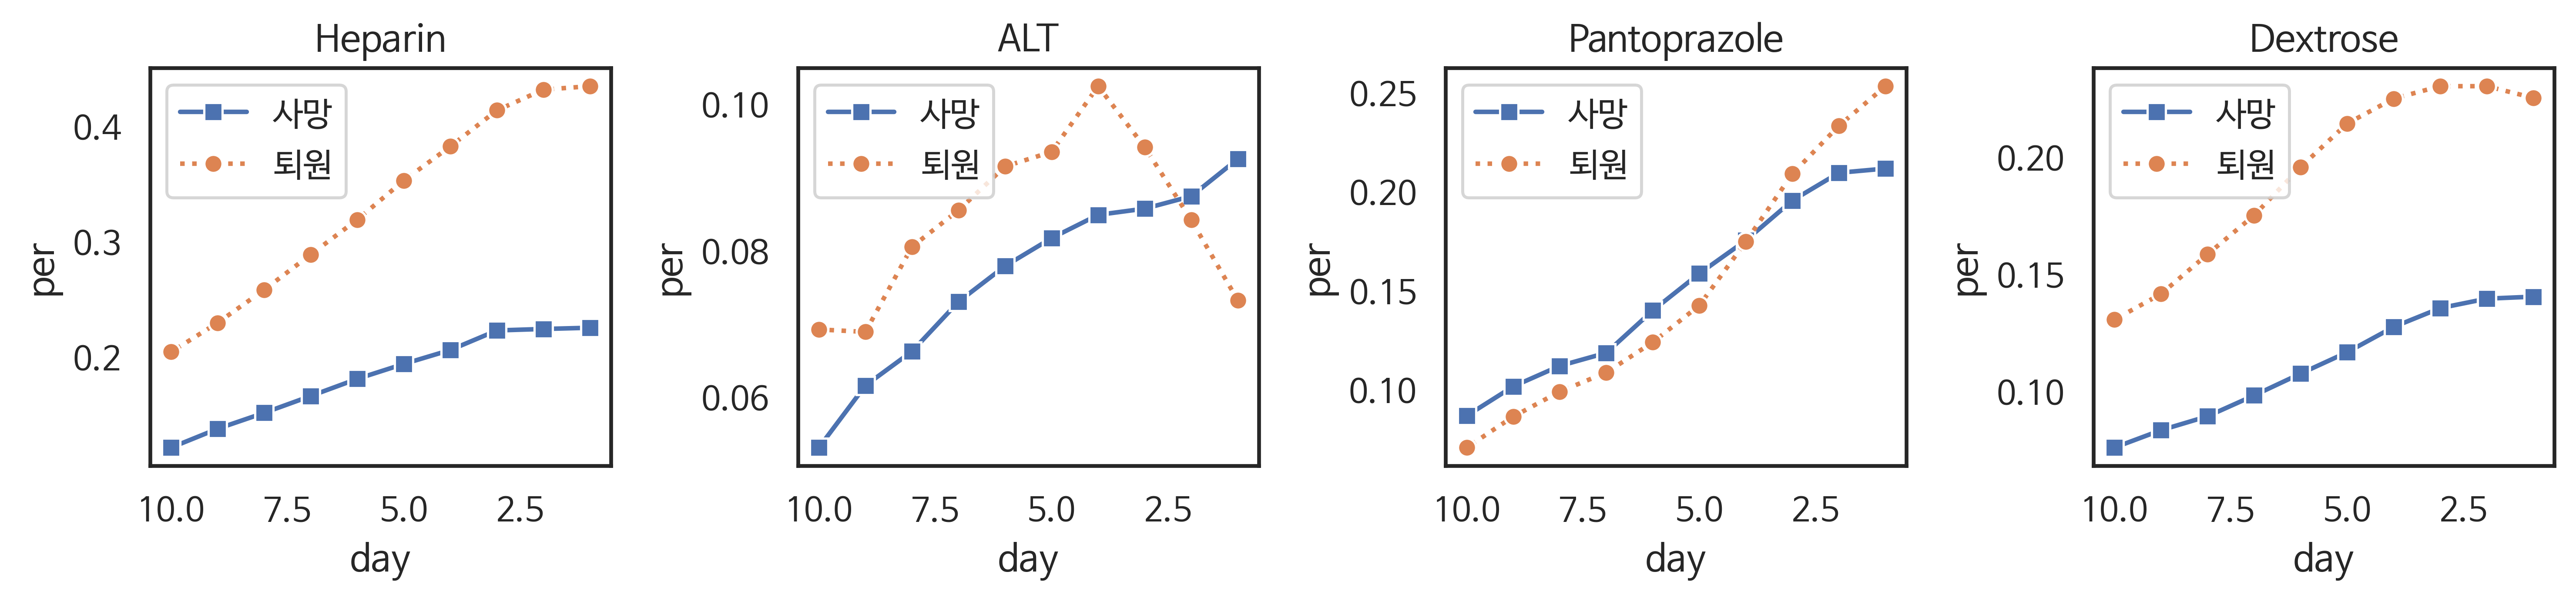

In [19]:
s_marker = [63323026201, 50861, 8084199, 409490234]
name = {63323026201 : 'Heparin', 50861: 'ALT', 8084199: 'Pantoprazole', 409490234:'Dextrose'}

visualization(s_marker, name)

In [69]:
marker = [51277, 51006, 50912, 409176230, 63323026201, 50861, 8084199, 409490234]
name = {51277: 'RDW', 51006: 'Urea Nitrogen', 50912: 'Creatinine', 409176230:'Morphine Sulfate', 63323026201 : 'Heparin', 50861: 'ALT', 8084199: 'Pantoprazole', 409490234:'Dextrose'}

visualization(marker, name)

